# NE 205: Semiconductor Devices and IC Technology

## Mid-Term

In [1]:
import scipy as sp
from scipy import constants
import matplotlib.pyplot as plt
import matplotlib.text as mtext
import math
from fdint import *
from obpds import *

epsilon_0 = 0.01*constants.epsilon_0 # multiply by 0.01 to covert to F/cm 
q=constants.e
k=constants.k
pi=constants.pi

T=300
Vth=k*T/q
a0=epsilon_0/q
a1=epsilon_0*q
chi=GaAs.electron_affinity()

## 3)


\begin{equation}
        \begin{aligned}
        \boxed {
            N_C = 4.7 \times 10^{17}\ cm^{-3} \\[10pt]
            In\ n+\ region,\ N_D = 3.6 \times 10^{17}\ cm^{-3} \\[10pt]
            E_F = (E_c)_{x\to\infty} \\[10pt]
            n_i = 2.1 \times 10^{6}\ cm^{-3} \\[10pt]
            \phi_B = 0.3 \hspace{2pt}V\\[10pt]
            E_g = 1.42\ eV \\[10pt]
            \epsilon_r = 12.9 \\[10pt]
            E_F = (E_c)_{x\to\infty} \\[10pt]
            t_{i-GaAs}= 300 \ nm
           }   
        \end{aligned}
        \label{pr3}
        \tag{3}
\end{equation}

Let $E_F$ = 0

Then, in semiconductor,

\begin{equation}
        \boxed {
            \frac{1}{q}\frac{d^2 E_c}{dx^2}  = \frac{q[N_D(x)+p(x)-n(x)]}{\epsilon_0 \epsilon_r}\ (\ Poisson's\  equation\ ) \\[15pt]
            (E_c)_{x=0}=\phi_B\ ;\ (E_c)_{x\to\infty}=0 \\[15pt]
           N_D(x) = 0\ if\ 0\leq x \lt t\\[10pt] 
           N_D(x) = 3.6 \times 10^{17}\ cm^{-3}\ if\ x \geq t  
        }
        \label{eq3.1}
        \tag{3.1}
\end{equation}

Let $\psi$ = $\frac{E_c-E_F}{k_B T}$ and $L_D$  = $\frac{1}{q}\sqrt{\frac{\epsilon_0 \epsilon_r k_B T}{N_c} }\approx 6.3\ nm $

\begin{equation}
    \implies \frac{1}{k_B T}\frac{d E_c}{dx}  = \frac{d \psi}{dx} \\[10pt]
    \implies \frac{1}{k_B T}\frac{d^2 E_c}{dx^2}  = \frac{d^2 \psi}{dx^2} \\[10pt]
    \implies \frac{q}{k_B T}\frac{1}{q}\frac{d^2 E_c}{dx^2}  =   \frac{d^2 \psi}{dx^2}
\end{equation}

\begin{equation}
    \boxed {
    p(x) = N_V \frac{2}{\sqrt{\pi}} F_{1/2} (\frac{E_V-E_F}{k_B T}) \approx e^{\frac{E_V-E_F}{k_B T}} \ since\  \frac{E_V-E_F}{k_B T}\lt -3  \\[10pt]
    n(x) = N_C \frac{2}{\sqrt{\pi}} F_{1/2} (\frac{E_F-E_c}{k_B T})\\[10pt]
    where\ F_{1/2}(\eta_F) = \int_{0}^{\infty} \frac {\eta^{1/2}}{1 + e^{\eta-\eta_F}} d\eta \\[10pt]
    F_{1/2}(\eta_F) \approx \frac{\sqrt{\pi}}{2} e^{\eta_F} when\ \eta_F \lt -3 
    }
    \label{eq3.2}
    \tag{3.2}
\end{equation}

Then, using $\eqref{eq3.1}$,

\begin{equation}
        \boxed {
            \frac{d^2 \psi}{dx^2}  = \frac{1}{L_d^2} [\frac{N_D(x)}{N_c} + \frac{n_i^2}{N_c^2} e^{\psi(x)} - \frac{2}{\sqrt{\pi}}F_{1/2}(-\psi(x)) ]
        }
        \label{eq3.3}
        \tag{3.3}
\end{equation}

Discretising this equation,we get 

\begin{equation}
            \frac{\psi(x+dx) - 2\psi(x) + \psi(x-dx) }{(dx)^2}  = \frac{1}{L_d^2} [\frac{N_D(x)}{N_c} + \frac{n_i^2}{N_c^2} e^{\psi(x)} - \frac{2}{\sqrt{\pi}}F_{1/2}(-\psi(x))]\\[10pt]
       \implies \psi(x+dx) - 2\psi(x) + \psi(x-dx)   = \frac{(dx)^2}{L_d^2} [\frac{N_D(x)}{N_c} + \frac{n_i^2}{N_c^2} e^{\psi(x)} - \frac{2}{\sqrt{\pi}}F_{1/2}(-\psi(x))\ ]
\end{equation}

\begin{equation}
       \implies \boxed {
\psi(x) = \frac{1}{2} (\psi(x+dx) + \psi(x-dx) - \frac{(dx)^2}{L_d^2} [\frac{N_D(x)}{N_c} + \frac{n_i^2}{N_c^2} e^{\psi(x)} - \frac{2}{\sqrt{\pi}}F_{1/2}(-\psi(x)) ]  
        }
        \label{eq3.4}
        \tag{3.4}
\end{equation}
        
Then, explicit finite difference method is used to solve the equation.   

\begin{equation}
 \vec{E} =  \frac{1}{q}\frac{d E_c}{dx} \hat{i}\ where\ \hat{i}\ is\ unit\ vector\ in\ the\ direction\ pointing\ away\  from\ metal\ towards\ semiconductor\ \      
  \label{eq3.5}
        \tag{3.5}
\end{equation}

\begin{equation}
       \implies \boxed {
\vec{E}(x)= \frac{E_c(x+dx) - E_c(x-dx)}{2(dx)q} \hat{i}    
        }
        \label{eq3.6}
        \tag{3.6}
\end{equation}

\begin{equation}
           \rho(x) = q[N_D(x) + p(x)-n(x)]    \\[10pt]
\end{equation}

\begin{equation}
       \implies \boxed {\rho(x) = q[N_D(x) + \frac{n_i^2}{N_c}e^{\psi(x)}- N_c \frac{2}{\sqrt{\pi}}F_{1/2}(-\psi(x))]=\frac{\epsilon_0 \epsilon_r}{q}\frac{d^2 E_c}{dx^2} \\[10pt] 
       {\epsilon_0 \epsilon_r} \frac{d \vec{E}(x)}{dx} = \rho(x) \hat{i}
       }
       \label{eq3.7}
        \tag{3.7}
\end{equation}

\begin{equation}
       {\epsilon_0 \epsilon_r} \frac{d \vec{E}(x)}{dx} = \rho(x) \hat{i}
\end{equation}

\begin{equation}
       \implies \boxed {
       {\epsilon_0 \epsilon_r} \frac{\vec{E}(x+dx)-\vec{E}(x-dx)}{dx} = \rho(x) \hat{i}
       }
       \label{eq3.8}
        \tag{3.8}
\end{equation}



In [9]:
Nc=4.7e17
Nv=7e18
Nd=3.6e17
ni=2.1e6
epsilon_r=12.9
t=300 # in nm
phi_b=0.3 # in eV
b1=a0*epsilon_r
b2=(ni/Nc)**2
b3=b1/Nc
b4=Nd/Nc
b5=2/(pi**0.5)

Eg=1.42 #in eV
L_d=1e7*(b3*Vth)**0.5 # in nm

dx=1 # in nm
x=sp.linspace(0,2*t,2*t+1)
psi=sp.linspace(phi_b/Vth,0,2*t+1)

r=(dx/L_d)*(dx/L_d)

def f(psi):
    if(index>=t):
        return r*(b4 + math.exp(psi)*b2 - b5*fdk(k=0.5,phi=-psi))
    else:
        return r*(math.exp(psi)*b2 - b5*fdk(k=0.5,phi=-psi))

def update_psi(index):
    return 0.5*(psi[index+1]+psi[index-1]-f(psi[index]))

while True:
    change_max=0
    for index in range(1,2*t):
        last=psi[index]
        cur=psi[index]=update_psi(index)
        change=abs(cur-last)
        change_max=max(change,change_max)    
    if(change_max<1e-9):
        break
    
Ec=psi*Vth
Ev=Ec-Eg

rho=sp.linspace(0,0,2*t+1)
field=sp.linspace(phi_b/t,phi_b/t,2*t+1)

for index in range(1,2*t):
    field[index]=0.5*1e4*(Ec[index+1]-Ec[index-1])/dx # in kV/cm
    
field[0]=1e4*(Ec[1]-Ec[0])/dx # in kV/cm
field[2*t]=1e4*(Ec[2*t]-Ec[2*t-1])/dx # in kV/cm
        
for index in range(1,2*t):
    rho[index]=0.5*1e10*b1*(field[index+1]-field[index-1])/dx # charge(in units of charge of electron) per cubic centimeter    

rho[0]=1e10*b1*(field[1]-field[0])
rho[2*t]=1e10*b1*(field[2*t]-field[2*t-1])

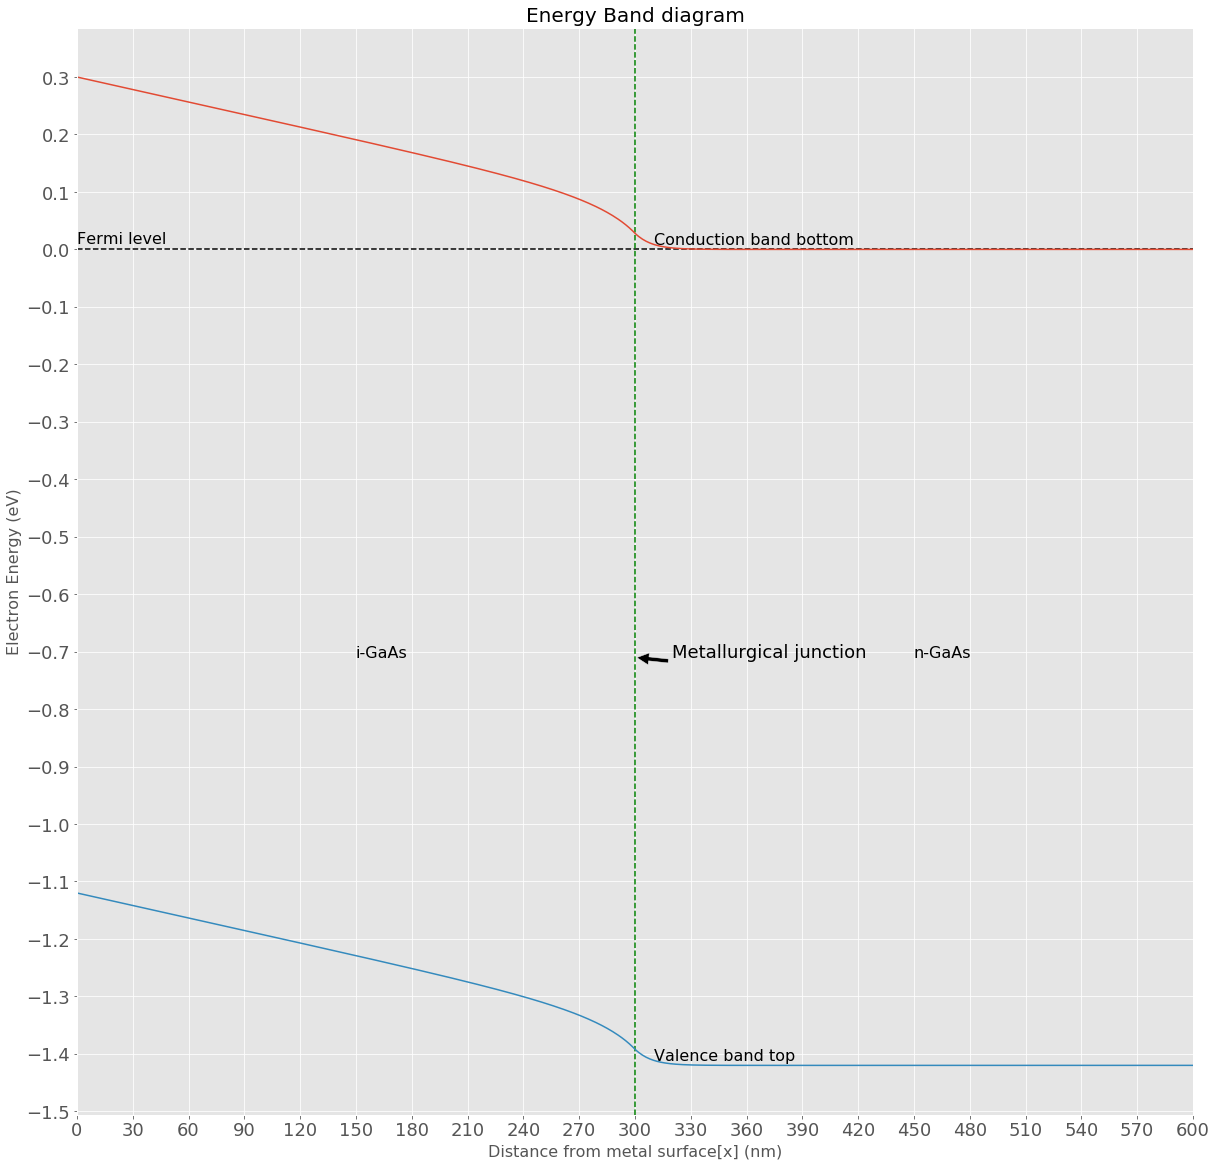

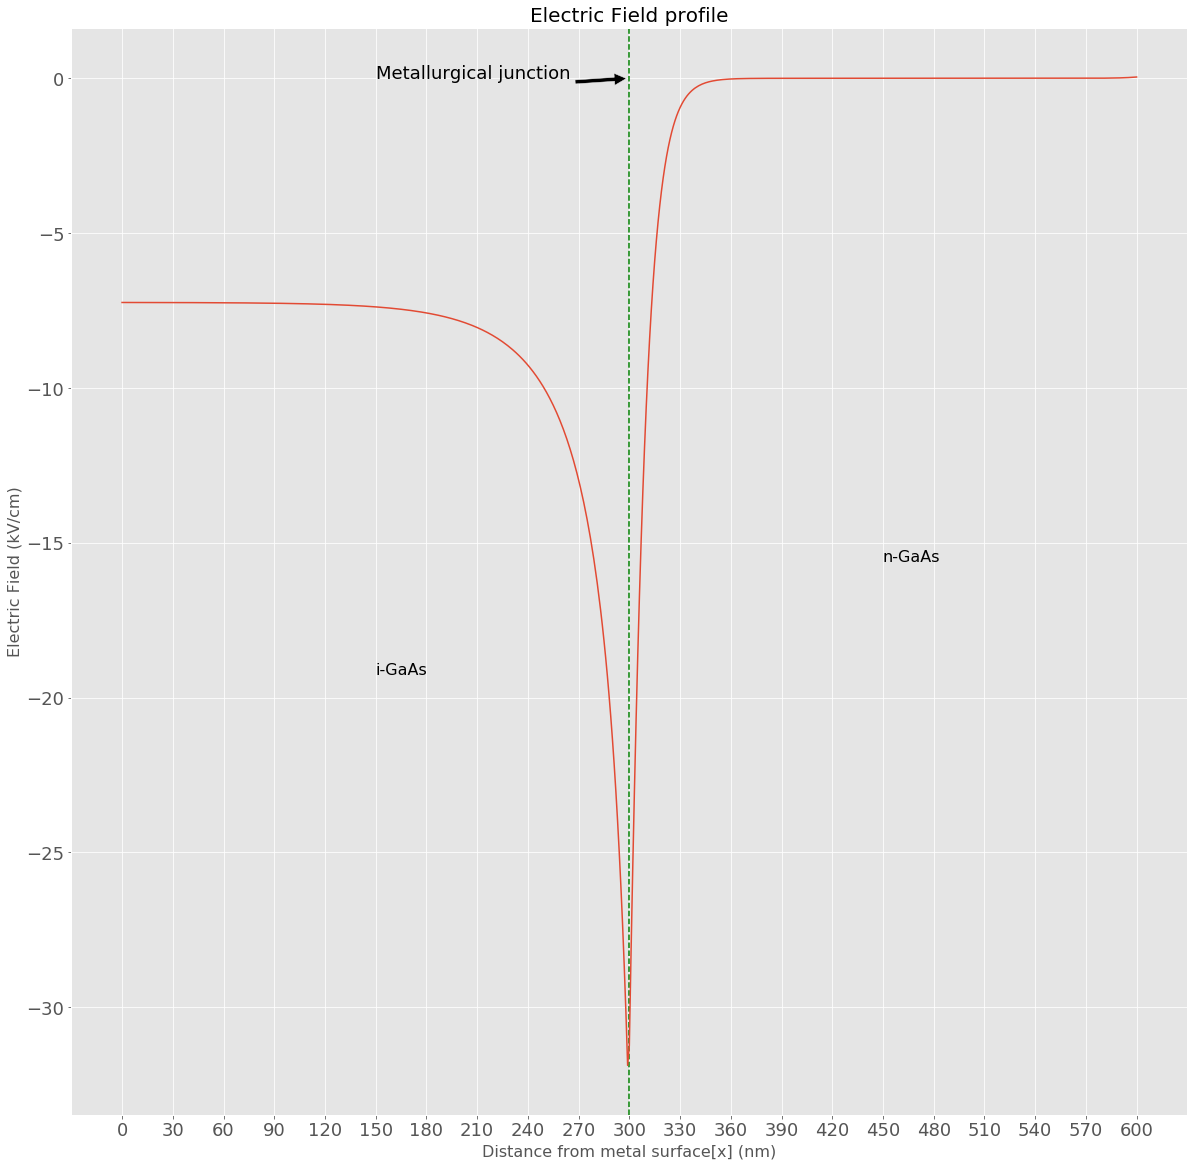

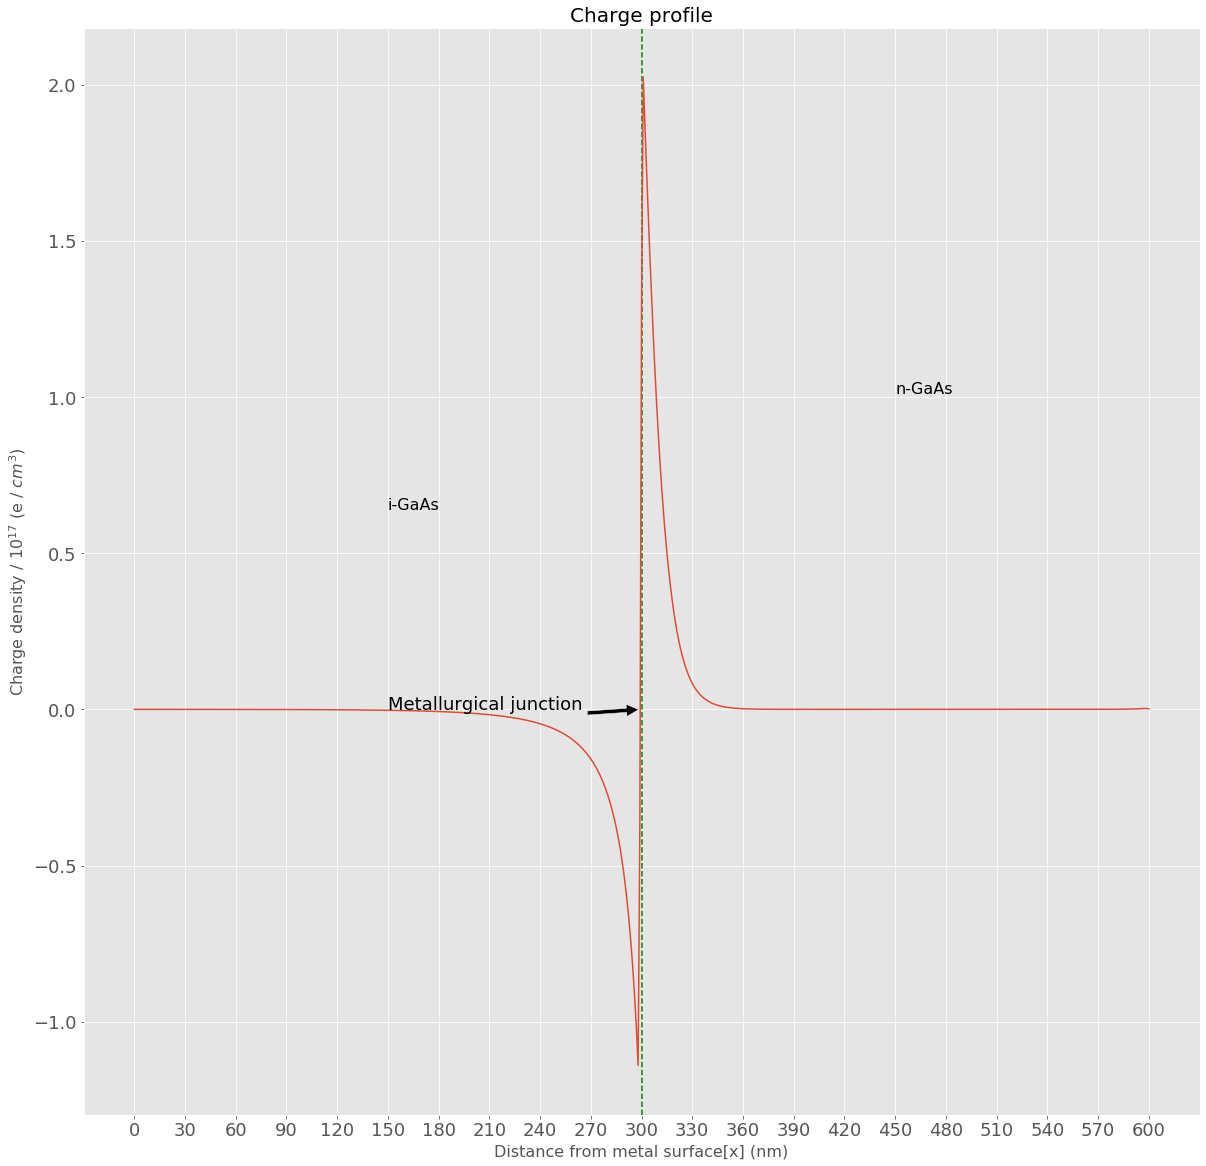

In [10]:
plt.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"] = (20,20)
plt.grid(True, which="both")
plt.title('Energy Band diagram',fontsize=20)
plt.ylabel('Electron Energy (eV)',fontsize=16)
plt.xlabel('Distance from metal surface[x] (nm)',fontsize=16)
plt.xticks(sp.linspace(0, 2*t, 21))          
plt.yticks(sp.linspace(0.3, -1.5, 19))                    
plt.axhline(y=0,color='black',linestyle='--')
plt.axvline(x=t,color='green',linestyle='--')
plt.text(x[t+10],Ec[t+10], 'Conduction band bottom',fontsize=16)
plt.text(x[t+10],Ev[t+10], 'Valence band top',fontsize=16)
plt.text(0,0.01, 'Fermi level',fontsize=16)
plt.text(0.5*t,-Eg/2, 'i-GaAs',fontsize=16)
plt.text(1.5*t,-Eg/2, 'n-GaAs',fontsize=16)
plt.annotate('Metallurgical junction', xy=(t, -Eg/2), xytext=(t+20, -Eg/2),arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlim((0,2*t))
plt.plot(x,Ec,x,Ev)
plt.show()

plt.grid(True, which="both")
plt.title('Electric Field profile',fontsize=20)
plt.ylabel('Electric Field (kV/cm)',fontsize=16)
plt.xlabel('Distance from metal surface[x] (nm)',fontsize=16)
plt.axvline(x=t,color='green',linestyle='--')
plt.text(0.5*t,0.5*(field[t]+field[0]), 'i-GaAs',fontsize=16)
plt.text(1.5*t,0.5*(field[2*t]+field[t]), 'n-GaAs',fontsize=16)
plt.annotate('Metallurgical junction', xy=(t, 0), xytext=(t-150, 0),arrowprops=dict(facecolor='black', shrink=0.05))
plt.xticks(sp.linspace(0, 2*t, 21))          
plt.plot(x,field)
plt.show()

plt.grid(True, which="both")
plt.title('Charge profile',fontsize=20)
plt.ylabel('Charge density / $10^{17}$ (e / $cm^3$)',fontsize=16)
plt.xlabel('Distance from metal surface[x] (nm)',fontsize=16)
plt.xticks(sp.linspace(0, 2*t, 21))
plt.axvline(x=t,color='green',linestyle='--')
plt.text(0.5*t,0.5*1e-17*(rho[t]+rho[0]), 'i-GaAs',fontsize=16)
plt.text(1.5*t,0.5*1e-17*(rho[2*t]+rho[t+1]),'n-GaAs',fontsize=16)
plt.annotate('Metallurgical junction', xy=(t, 0), xytext=(t-150, 0),arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot(x,rho*1e-17)
plt.show()

## Solution using OBPDS

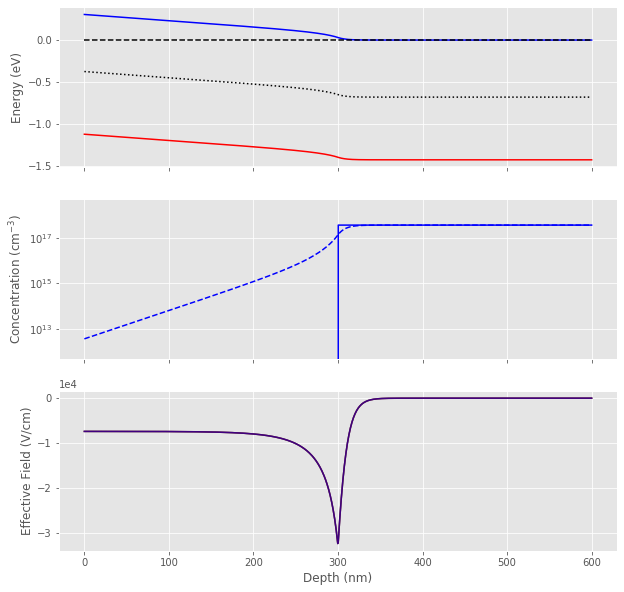

In [2]:
t=0.3
phi_b=0.3
phi_m=chi+phi_b

# Layers
i = Layer(t*um, GaAs)
n = Layer(t*um, GaAs, -3.6e17/cm3)

# Device
d = TwoTerminalDevice(layers=[i, n],
                      contacts=[SchottkyContact(phi_m), OhmicContact()],
                      Fn=['right','right'])

# Simulate and show the equilibrium band profile using the default method.
d.show_equilibrium()